# Confidence Intervals & Outliers

## Learning Objectives (Competencies)
By the end of this lesson, students will be able to:
1. Describe confidence interval and when and how apply to a sample data
2. Describe what is outlier and how to remove outlier for univariate data
3. Visualize the outliers by box-plot


## What is confidence interval?

It is useful to estimate an interval for the possible values of the parameter and put a probability on how confident we are that the true parameter value falls inside this interval

## Example
We have the data X and assume we know the population standard deviation ($\sigma$). What is confidence interval for population mean?
$P(L &lt; \mu &lt; U) = 1 - \alpha$
We want to obtain $L$ and $U$, with 1-$\alpha$ confidence

# From Statistics references
$L = \bar{x} - z_{1- \alpha/2}\frac{\sigma}{\sqrt{N}}$
$U = \bar{x} + z_{1- \alpha/2}\frac{\sigma}{\sqrt{N}}$

## Activity: Obtain the confidence interval for mean of sepal length for Setosa
The dataset we will work is iris.cvs
Tasks:
1- Explore this dataset. How many features, records and plants does it have?
2- Gather all of the sepal length for Iris-Setosa
3- Write a function that calculate lower and upper bound for mean of sepal length for Iris-Setosa with %95 confidence.
Assume $\sigma = 0.3525$
Hint: use scipy.stats.norm.ppf() to calculate $z_{1- \alpha/2}$

```Python
import pandas as pd
import numpy as np
import scipy.stats

df = pd.read_csv('Iris.csv')

x = df[df['Species'] == 'Iris-setosa']['SepalLengthCm'].tolist()

print(np.mean(x))

def ci_z(data_sample, significant_level, sigma):
    z = scipy.stats.norm.ppf(1-significant_level/2)
    L = np.mean(data_sample) - z*sigma/np.sqrt(len(data_sample))
    U = np.mean(data_sample) + z*sigma/np.sqrt(len(data_sample))
    return L, U


def ci_t(data_sample, significant_level):
    t = scipy.stats.t.ppf(1 - significant_level/2, len(data_sample) - 1)
    L = np.mean(data_sample) - t * np.std(data_sample, ddof=1) / np.sqrt(len(data_sample))
    U = np.mean(data_sample) + t * np.std(data_sample, ddof=1) / np.sqrt(len(data_sample))
    return L, U

print(ci_z(x, 0.05, 0.3525))
print(ci_t(x,0.05))
```

## Outlier Detection
Outliers are extreme values that can skew our dataset, sometimes giving us an incorrect picture of how things actually are in our dataset. The hardest part of this is determining which data points are acceptable, and which ones constitute "outlier" status.

## Activity: find and remove outliers if our dataset is Normal

- When our sample data is close to normal distribution, the samples that be outside of three standard deviation can be considered as outliers.
- Task: Write a function that first find outliers for a normally distributed data, then remove them.

```Python
import numpy as np

def find_remove_outlier(data_sample):
    # calculate summary statistics
    data_mean, data_std = np.mean(data), np.std(data)
    # define cut-off
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    # identify outliers
    outliers = [x for x in data_sample if x < lower or x > upper]
    # remove outliers
    outliers_removed = [x for x in data_sample if x > lower and x < upper]
    return outliers, outliers_removed
```

## Interquartile range (IQR) for finding and removing outlier when data has any distribution (10 min)

Tukey suggested to calculate the range between the first quartile (25%) and third quartile (75%) in the data, called the interquartile range (IQR).

## Activity: IQR outlier detection and removal
Task: write a function to find and remove outliers based on IQR method for this data sample:
Hint:
$Q_1$ is the first quartile (25%)
$Q_3$ is the third quartile (75%)

![](../Notebooks/Images/iqr.png)

```Python
import numpy as np

def find_remove_outlier_iqr(data_sample):
    # calculate interquartile range
    q25, q75 = np.percentile(data_sample, 25), np.percentile(data_sample, 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = [x for x in data_sample if x < lower or x > upper]
    # remove outliers
    outliers_removed = [x for x in data_sample if x > lower and x < upper]
    return outliers

y = np.array([-5, 11, 14])
x =  np.concatenate((scipy.stats.norm.rvs(loc=5 , scale=1 , size=100), y))
print(type(x))
print(find_remove_outlier_iqr(x))
print(scipy.stats.iqr(x))

```


## How we can visually see the outlier?¶
Box plot use the IQR method to display data and outliers
```Python
import matplotlib.pyplot as plt

plt.boxplot(x)

plt.show()
```

## Resources
- Read this assignment from CS department of Utah [Estimation and Confidence Intervals](https://www.cs.utah.edu/~jeffp/teaching/cs3130/homeworks/hw7.pdf)

In [5]:
import pandas as pd
import numpy as np
import scipy.stats

import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
setosa_lengths = iris[iris['species'] == 'setosa']['sepal_length'].tolist()

print(np.mean(setosa_lengths))

# confidence interval for a z-test
def confidence_interval_z(data_sample, significant_level, sigma):
    z_score = scipy.stats.norm.ppf(1-significant_level/2)
    L = np.mean(data_sample) - z_score*sigma/np.sqrt(len(data_sample))
    U = np.mean(data_sample) + z_score*sigma/np.sqrt(len(data_sample))
    return L, U

# confidence interval for a t-test
def confidence_interval_t(data_sample, significant_level):
    t_score = scipy.stats.t.ppf(1 - significant_level/2, len(data_sample) - 1)
    L = np.mean(data_sample) - t_score * np.std(data_sample, ddof=1) / np.sqrt(len(data_sample))
    U = np.mean(data_sample) + t_score * np.std(data_sample, ddof=1) / np.sqrt(len(data_sample))
    return L, U

print(confidence_interval_z(setosa_lengths, 0.05, 0.3525))
print(confidence_interval_t(setosa_lengths,0.05))

5.006
(4.908293780383348, 5.103706219616653)
(4.905823539430869, 5.106176460569132)


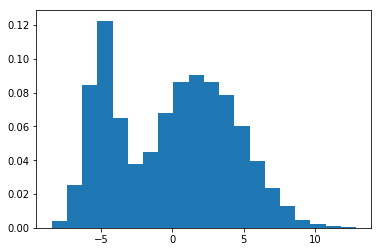

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture

# Generate data samples and plot its histogram
x_1 = np.random.normal(-5, 1, 3000)
x_2 = np.random.normal(2, 3, 7000) 
x = np.concatenate((x_1, x_2))
plt.hist(x, bins=20, density=1)
plt.show()

In [9]:
def corrplot_(df=None, mask_type="numerical", figsize=(14, 14), fontsize=8, cpalette=(10, 220)):
    """ Global function that produces customized correlation plot reducing redundancy. """    
    if df is None:
        raise ReferenceError("\nDataFrame not found.")
    corr_data = df.corr()

    # Creates whitespace mask over upper right triangle section for repeated features
    upper_triangle_mask = np.zeros_like(corr_data, dtype=np.bool)
    upper_triangle_mask[np.triu_indices_from(upper_triangle_mask)] = True
    
    # Generates MatPlotLib subplot objects
    fig, ax = plt.subplots(figsize=figsize)
    
    # Calculates relative maximum from correlational data
    vmax = np.abs(corr_data.values[~upper_triangle_mask]).max()
    
    # Creates correlational heatmap with simple color intensity relative to distribution
    cmap = sns.diverging_palette(cpalette[0], cpalette[1], as_cmap=True)
    sns.heatmap(corr_data, mask=upper_triangle_mask, cmap=cmap, vmin=-vmax, vmax=vmax, square=True, linecolor="lightgray", linewidths=1, ax=ax)
    
    # Overlays feature names and corr. data values over whitespace mask
    for iterator in range(len(corr_data)):
        ax.text(iterator+0.5, iterator+0.5, corr_data.columns[iterator], ha="center", va="center", rotation=45)
        
        for jterator in range(iterator+1, len(corr_data)):
            value = "{:.3f}".format(corr_data.values[iterator, jterator])
            
            # Switch-case for numerical whitespace mask
            if mask_type == "numerical":
                ax.text(jterator+0.5, (iterator+0.5), value, ha="center", va="center")
                
            # Switch-case for categorical whitespace mask
            if mask_type == "categorical":
                ax.text(jterator+0.5, (iterator+0.5), _value_to_category(value), ha="center", va="center", fontsize=fontsize)
    ax.axis("off")

def _value_to_category(value):
    """ Helper function to convert numerical values between -1.0 and 1.0 to discretized categories. """
    _categorical_types, _value_ranges_test = ["- (S)", "- (M)", "- (W)", "0", "+ (W)", "+ (M)", "+ (S)"], [-1.0, -0.7, -0.4, -0.1, 0.1, 0.4, 0.7, 1.0]
    # Iterates through value ranges and checks if value falls within specific range
    for index in range(len(_value_ranges_test) - 1):
        if float(value) >= _value_ranges_test[index] and float(value) < _value_ranges_test[index + 1]:
            return _categorical_types[index]